# Data Cleaning
This is an example to apply data cleaning techniques. The main objective is to prepare the data to apply a prediction over the sales variable. 
Dataset: https://www.kaggle.com/kyanyoga/sample-sales-data/data. 
The following activities are executed in this tutorial:

- Resolve NA
- Draw a bar plot that shows the total sales for each country.  
- Draw a pie chart that shows the amount of rows for each country.
- Transform the columns that are not numeric to categorical. It is important to identify which are the cases that the variable is not numerical and needs to be transformed to categorical. See if it is ordered or not. 
- Remove columns that can be inferred by other columns. Some of the columns might be calculated in function of other columns, those variables would need to be removed, because they will be highly correlated and are not useful information because it can be implied from other variables. The idea is to keep only useful information to perform the prediction. 
- Show the first rows of the cleaned dataframe. 
- Transform categorical to binary variables. Before performing the model, all the variables needs to be numerical. Therefore, it is necessary to transform the categorical variables to numbers. As all the categorical variables do not have any order, they would need to be converted to dummy variables. 
- Normalize data. Normalization is important in order to be able to compare values between variables. 
- Save the new data frame into a file. Once cleaned and normalized the data, it can be saved into a new file, which will be available for executing the model.
- Represent the sales across countries by a colored map.

Try it yourself and then check your results!

## Load data into a dataframe
A **dataframe** is a representation of the data in a table format by an array-like structure. 
Where each column corresponds to values for each variable.
Download the data from https://www.kaggle.com/kyanyoga/sample-sales-data/data and save it as sales_data_sample.csv in the current directory. Then load it into a dataframe using pandas. 

In [1]:
#Insert your code here

In [2]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [3]:
#Download data from 
import pandas as pd
df = pd.read_csv("sales_data_sample.csv", encoding = "ISO-8859-1")

## Show the columns of the dataframe

In [4]:
#Insert your code here

In [5]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

Show the first rows of the dataframe

In [7]:
#Insert your code here

In [8]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## NAs values
Analyze if the data contains NAs values (NAs represent missing values).

In [10]:
#Insert your code here

In [11]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [12]:
#see NAs values
print(df.shape)
df.isnull().sum()

(2823, 25)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In case that the data contains missing values decisions need to be made. This can be by for example, removing those cases, filling with some default value or with the mean/average. 

In [13]:
#Insert your code here

In [14]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [15]:
#resolve NAs values
#ADDRESSLINE2 - means that does not have another address - not useful for analysis - drop column
#state - if it is NA means that is not in USA, - fill with empty string 
#POSTALCODE - delete rows that does not have postal code
#TERRITORY - not clear meaning, drop column 
df.drop(["ADDRESSLINE2","TERRITORY"],axis=1,inplace=True)
df["STATE"].fillna("", inplace = True) 
df.dropna(inplace=True)
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

Show the different values for the variable COUNTRY

In [16]:
#Insert your code here

In [17]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [18]:
#get the different countries
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

## Drop columns
Drop the columns that do not provide relevant information for the prediction: There are some columns that are text values such as the address that do not provide relevant information for predicting the sales and will make the problem more complex if are inputs of the model. Therefore, sometimes is better to remove those variables to simplify the model. 

In [19]:
#Insert your code here

In [20]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [21]:
#drop not important information 
df.drop(["ORDERNUMBER","ORDERLINENUMBER","ORDERDATE", "STATUS", "QTR_ID", "MSRP", "PRODUCTCODE", "CUSTOMERNAME", "PHONE", "ADDRESSLINE1", "CITY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis=1,inplace=True)

GROUP by COUNTRY and show the sum of SALES for each COUNTRY 

In [22]:
#Insert your code here

In [23]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

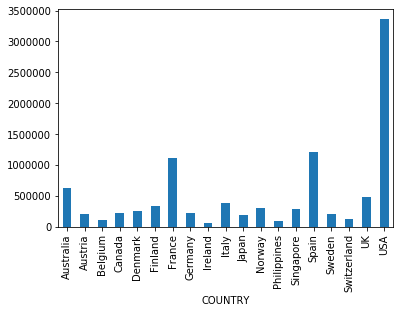

In [24]:
df.groupby(['COUNTRY'])['SALES'].sum().plot(kind='bar')

# Visualize data
Show pie chart to see how many rows are from USA: there are a lot, which makes sense that the sales are more in that case.

In [25]:
#Insert your code here

In [26]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

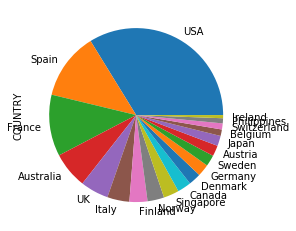

In [27]:
df.COUNTRY.value_counts().plot(kind='pie')

Create a bar chart that shows the SALES for each PRODUCTLINE for each COUNTRY

In [28]:
#Insert your code here

In [29]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

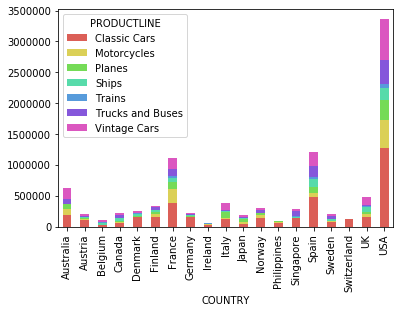

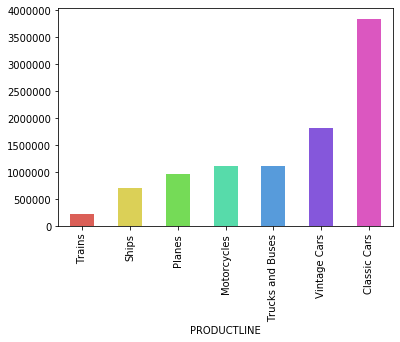

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sorted_values = df.groupby(['PRODUCTLINE']).sum().unstack()['SALES'].sort_values()
palette = sns.color_palette("hls", len(sorted_values))
df.groupby(['COUNTRY','PRODUCTLINE']).sum().unstack()['SALES'].plot(kind='bar', stacked=True, color=palette)
plt.show()
sorted_values.plot(kind='bar', color=palette)
plt.show()

In [31]:
s = sorted_values.reset_index()['PRODUCTLINE'].astype(str)
df['PRODUCTLINE'] = pd.Categorical(df["PRODUCTLINE"], ordered=True, categories=list(s.values))
print(df['PRODUCTLINE'].cat.categories)
df['PRODUCTLINE'] = df['PRODUCTLINE'].cat.codes

Index(['Trains', 'Ships', 'Planes', 'Motorcycles', 'Trucks and Buses',
       'Vintage Cars', 'Classic Cars'],
      dtype='object')


# Transform categories
Transform PRODUCTLINE to an ordered categorical variable and print the categories names.

In [32]:
#Insert your code here

In [33]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [34]:
s = sorted_values.reset_index()['PRODUCTLINE'].astype(str)
df['PRODUCTLINE'] = pd.Categorical(df["PRODUCTLINE"], ordered=True, categories=list(s.values))
print(df['PRODUCTLINE'].cat.categories)
df['PRODUCTLINE'] = df['PRODUCTLINE'].cat.codes

Index(['Trains', 'Ships', 'Planes', 'Motorcycles', 'Trucks and Buses',
       'Vintage Cars', 'Classic Cars'],
      dtype='object')


Transform DEALSIZE variable to ordered values

In [35]:
#Insert your code here

In [36]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [37]:
df["DEALSIZE"] = pd.Categorical(df["DEALSIZE"], ordered=True, categories=['Small','Medium','Large'])
df["DEALSIZE"] = df["DEALSIZE"].cat.codes

Transform variables to not ordered categories to categorical variables

In [38]:
#Insert your code here

In [39]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [40]:
df["COUNTRY"] = pd.Categorical(df["COUNTRY"])
df["STATE"] = pd.Categorical(df["STATE"])

Because QUANTITYORDERED can be calculated as SALES/PRICEEACH is not necessary for the analysis. Drop this column from the dataframe. 

In [41]:
#Insert your code here

In [42]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [43]:
df.drop("QUANTITYORDERED", axis=1,inplace=True)

Now is time to see how the dataframe looks like!

In [44]:
#Insert your code here

In [45]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [46]:
df.head()

,PRICEEACH,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,STATE,COUNTRY,DEALSIZE
0,95.70,2871.00,2,2003,-1,NY,USA,0
1,81.35,2765.90,5,2003,-1,,France,0
2,94.74,3884.34,7,2003,-1,,France,1
3,83.26,3746.70,8,2003,-1,CA,USA,1
5,96.66,3479.76,10,2003,-1,CA,USA,1


Transform categorical to binary variables

In [47]:
#Insert your code here

In [48]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [49]:
categorical_variables = ['STATE','COUNTRY']
dummies = pd.get_dummies(df, categorical_variables) 

# Scale the data
scale the data by using MinMaxScaler from sklearn. 

In [50]:
#Insert your code here

In [51]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

Remove COUNTRY_USA variable because it can be infered by state_* columns 

In [52]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

np_scaled = min_max_scaler.fit_transform(dummies)
df_normalized = pd.DataFrame(np_scaled, columns = dummies.columns)


In [53]:
#Insert your code here

In [54]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [55]:
df_normalized.drop('COUNTRY_USA', axis=1, inplace=True)

# Save result
Now, save the cleaned data and the normalized data. 

In [56]:
#Insert your code here

In [57]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [58]:
#save the cleaned dataframe into csv
df_normalized.to_csv('cleaned_data.csv', index=False)
dummies.to_csv('dummies.csv', index=False)

# Other visualizations 
In order to visualize SALES across countries, use the geopandas library for plotting into a map. You can make a merge with the geopandas.datasets called naturalearth_lowres to be able to map the countries into the map. 

In [59]:
#Insert your code here

In [60]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

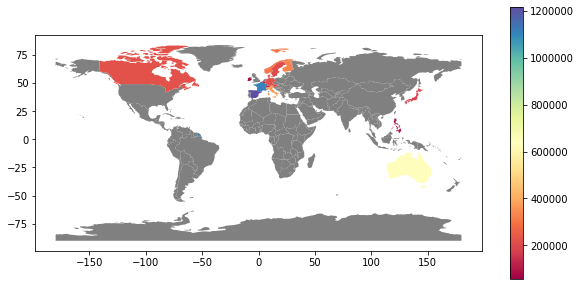

In [61]:
import geopandas
df_g = df[['COUNTRY','SALES']].groupby('COUNTRY').sum().reset_index()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
merged_inner = pd.merge(left=world, right=df_g, left_on='name',right_on='COUNTRY', how='left')
merged_inner['SALES'].fillna(-1, inplace=True)
from matplotlib import cm
fig, ax = plt.subplots(1,1, figsize=(10, 5))
cmap = cm.get_cmap('Spectral')
merged_inner[merged_inner['SALES']==-1].plot(legend=False, color='gray', ax=ax)
merged_inner[merged_inner['SALES']>-1].plot(column='SALES', legend=True, ax=ax, cmap=cmap)
plt.show()

Now we can plot into a map the total sales for each productline. So, group by COUNTRY and PRODUCTLINE variables and calculate the sum of SALES. 
After, by merging again the result with the geopandas dataset you can get the correspondence of each row into the map. 

In [62]:
#Insert your code here

In [63]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

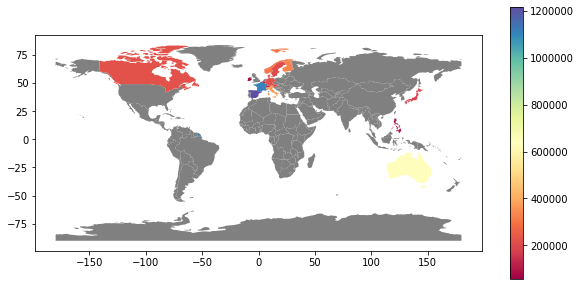

In [64]:
import geopandas
df_g = df[['COUNTRY','PRODUCTLINE','SALES']].groupby(['COUNTRY','PRODUCTLINE']).sum().reset_index()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
merged_inner = pd.merge(left=world, right=df_g, left_on='name',right_on='COUNTRY', how='left')
merged_inner['SALES'].fillna(-1, inplace=True)
from matplotlib import cm
fig, ax = plt.subplots(1,1, figsize=(10, 5))
cmap = cm.get_cmap('Spectral')
merged_inner[merged_inner['SALES']==-1].plot(legend=False, color='gray', ax=ax)
merged_inner[merged_inner['SALES']>-1].plot(column='SALES', legend=True, ax=ax, cmap=cmap)
plt.show()